<a href="https://colab.research.google.com/github/IshaSinghVatsa/MACHINE-LEARNING/blob/main/Lab7_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the required packages 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/hcvdat0.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(589, 14)
['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']


In [ ]:
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,609,3=Cirrhosis,58,f,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,610,3=Cirrhosis,59,f,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
data['Category'].replace(['0=Blood Donor', '0s=suspect Blood Donor','1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'],
                        [0,1,2,3,4], inplace=True)

In [ ]:
data['Sex'].replace(['f','m'],[0,1], inplace=True)

In [ ]:
data.drop('Unnamed: 0',axis=1)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,4,58,0,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7,80.6
609,4,59,0,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1,70.5
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3


In [ ]:
# Separating the target variable 
X = data[['ALP','CHOL','CREA']]
Y = data.Category

In [ ]:
# Splitting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 40)

In [ ]:
# perform training with giniIndex
# Creating the classifier object 
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 40,max_depth=3, min_samples_leaf=5)
# Fit the model 
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=40)

In [ ]:
# perform training with entropy
# Decision tree with entropy 
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 40,max_depth = 3, min_samples_leaf = 5)
# Fit the model  
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=40)

In [ ]:
# Function to make predictions 
def prediction(X_test, clf_object):
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred 

In [ ]:
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred):
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

In [ ]:
# Operational Phase 
print("Results Using Gini Index:")
# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy :  89.26553672316385


In [ ]:
print("Results Using Entropy:")
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy :  88.70056497175142


In [ ]:
#Print tree
def printTree(classifier):
    feature_names = ['Alkaline Phosphate', 'Cholesterol', 
                         'Creatinine']
    target_names = ['CAT-Female', 'CAT-Male']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier,                                      
                         out_file=None,feature_names=feature_names,
                         class_names=target_names, filled = True)
    
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

In [ ]:
#Print Gini tree
tr_gini = printTree(clf_gini)
tr_gini

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
lr=LogisticRegression(C=1.0,class_weight='balanced',dual=False,
fit_intercept=True, intercept_scaling=1,max_iter=100,multi_class='auto',
n_jobs=None,penalty='l2',random_state=1234,solver='lbfgs',tol=0.0001,
verbose=0,warm_start=False)

In [ ]:
model1=lr.fit(X_train,y_train) 
prediction1=model1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


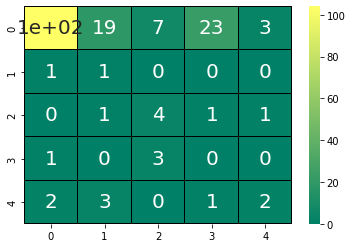

In [ ]:
cm=confusion_matrix(y_test,prediction1) 
sns.heatmap(cm,annot=True,cmap='summer',linewidths=0.1,
linecolor='black',annot_kws={"size":20})

In [ ]:
TP=cm[0][0] 
TN=cm[1][1] 
FN=cm[1][0] 
FP=cm[0][1]

In [ ]:
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy for Logistic Regression: 0.9658119658119658
